In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Стационарная задача теплопроводности

In [9]:
!rm -f task8_16_data/*
!cd comp_math_rs && cargo run --release --bin task8_16

   Compiling comp_math_rs v0.1.0 (/home/vlad/Documents/VSCode/MiptCompMath/comp_math_rs)
    Finished `release` profile [optimized] target(s) in 0.40s              
     Running `target/release/task8_16`


['jacobi', 'seidel', 'or_1.2', 'or_1.4', 'or_1.6', 'or_1.8']


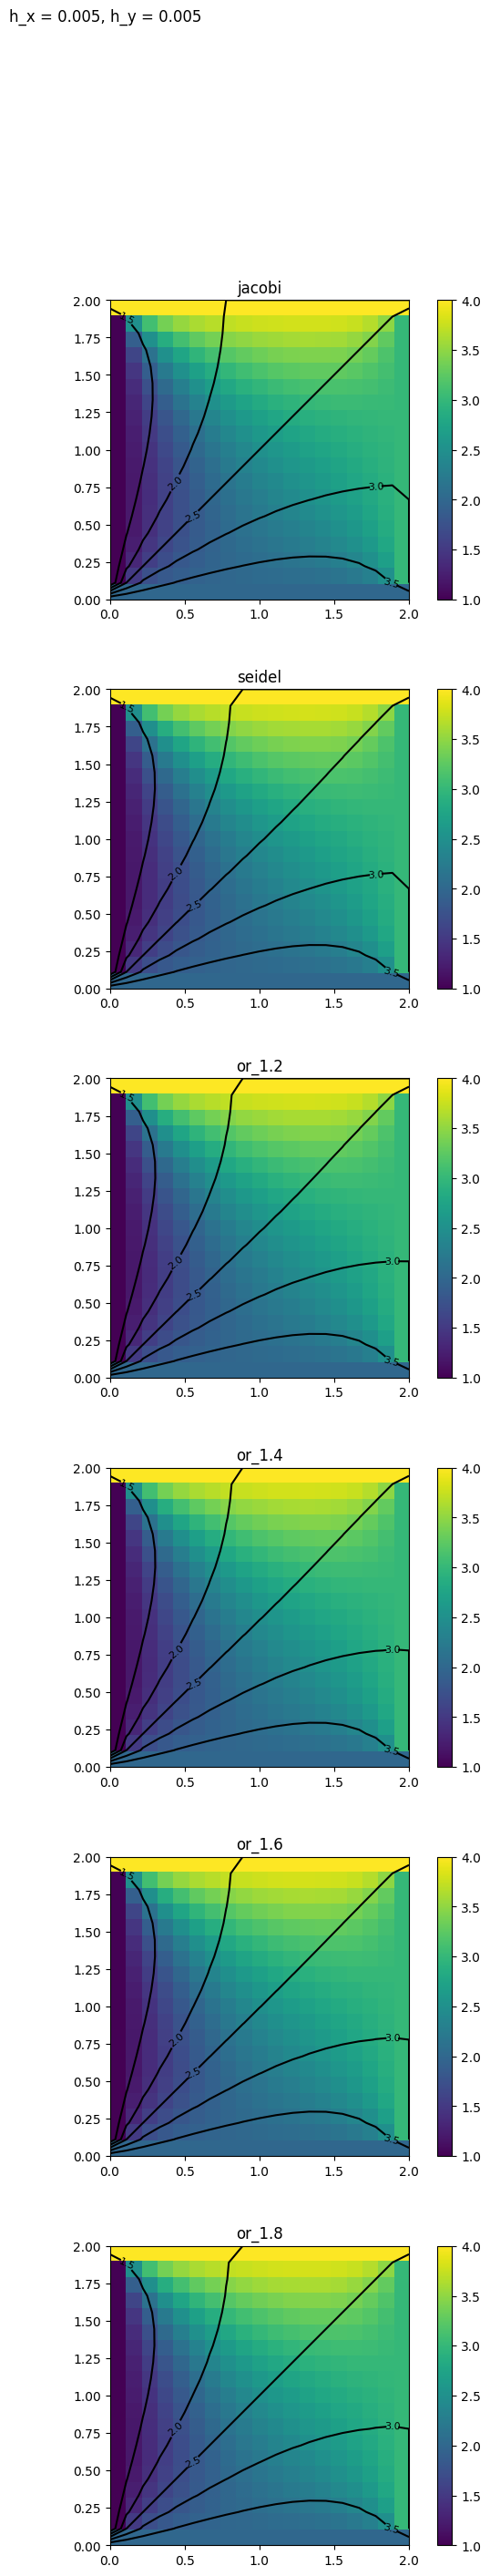

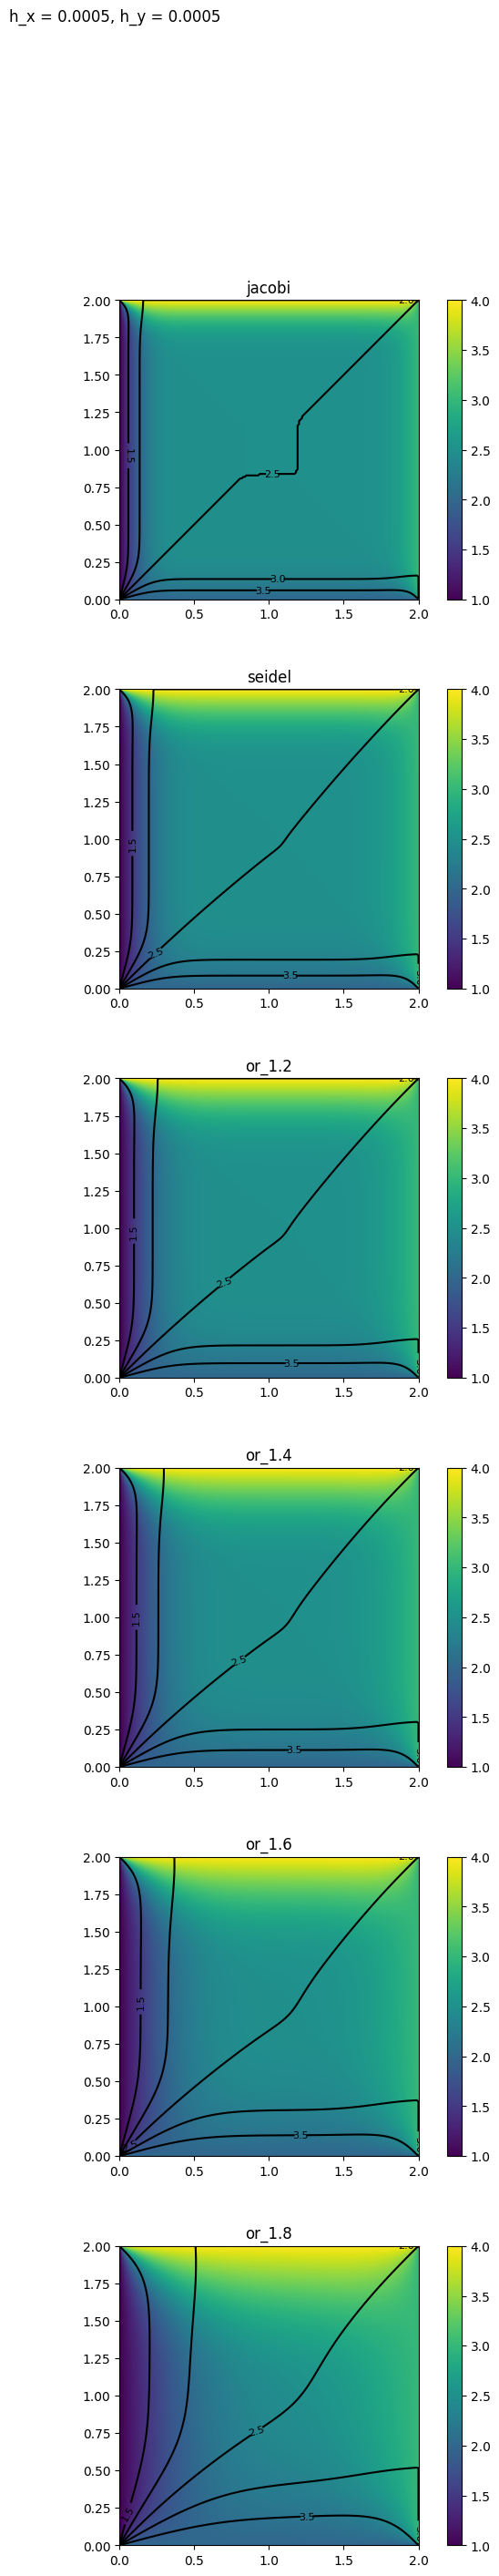

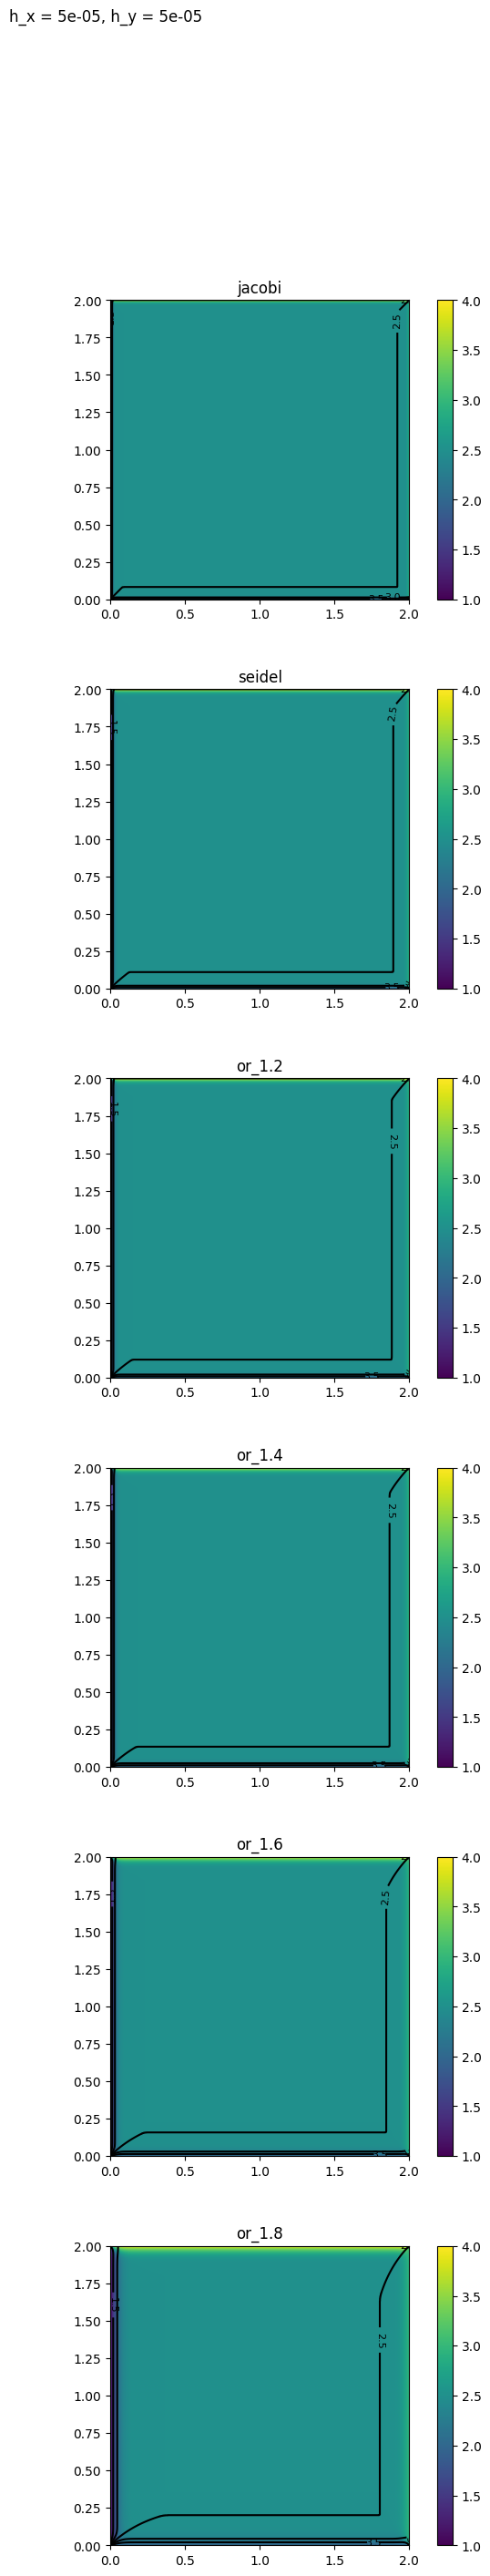

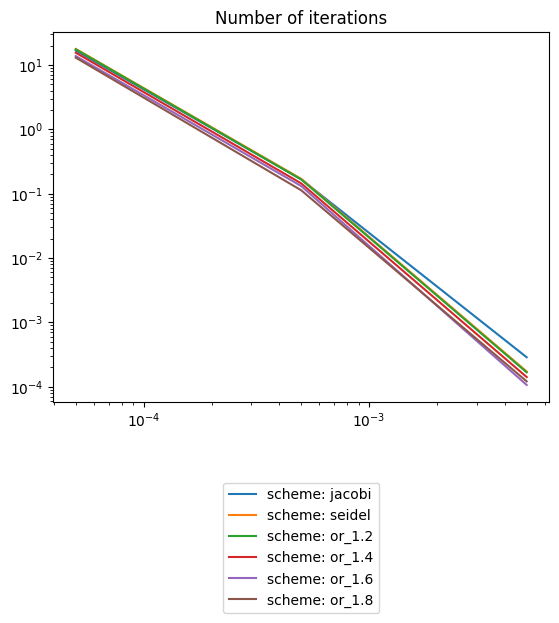

In [ ]:
directory = "task8_16_data"

h_error = {}
tau_error = {}

schemes = [
    "jacobi",
    "seidel",
    *[f"or_1.{i}" for i in range(2, 10, 2)],
]

print(schemes)

iterations_dict = {}

for scheme in schemes:
    iterations_dict[scheme] = {}

for x_h_pow in range(1, 4):
    # for tau_pow in range(1, 4):
    for y_h_pow in range(x_h_pow, x_h_pow + 1):
        fig = plt.figure(figsize=(10, 2 + 5 * len(schemes)))
        gs = gridspec.GridSpec(
            len(schemes),
            1,
            height_ratios=[1] * (len(schemes)),
            width_ratios=[1],
            wspace=0.05,
            hspace=0.3,
        )

        for scheme in schemes:
            with open(f"{directory}/{scheme}_{x_h_pow}_{y_h_pow}.csv", "r") as f:
                h_x = float(f.readline())
                h_y = float(f.readline())
                iterations = float(f.readline())
                time = float(f.readline())
                fig.suptitle(f"{h_x = :.8}, {h_y = :.8}")
                
                if h_x == h_y:
                    iterations_dict[scheme][h_x] = iterations

                data = []

                for line in f:
                    data.append(list(map(float, line.split(",")[:-1])))

                data = data[::-1]
                
                ax_ref = plt.subplot(gs[schemes.index(scheme), 0])
                ax_ref.set_title(scheme)
                im_ref = ax_ref.imshow(data, cmap="viridis", extent=[0, 2, 0, 2])
                plt.colorbar(im_ref, ax=ax_ref, fraction=0.046, pad=0.04)
                
                
                levels = [1.5, 2.0, 2.5, 3.0, 3.5]  # Choose contour levels
                contour = ax_ref.contour(data, levels=levels, colors='black', extent=[0, 2, 0, 2])
                ax_ref.clabel(contour, inline=True, fontsize=8)
                
                # plt.contour(im_ref, ax=ax_ref, fraction=0.046, pad=0.04)

                # ax_ref = plt.subplot(gs[schemes.index(scheme), 0])
                # ax_ref.colorbar(data)
                # # im_ref = ax_ref.imshow(data, cmap="viridis", extent=[0, 2, 0, 2])
                # # im_ref.colorbar(im_ref, ax=ax_ref, fraction=0.046, pad=0.04)
                # contour_levels = [0, 1, 2]
                # ax_ref.contour(data, levels=contour_levels, colors='red', linewidths=1)
                # contour_levels = [i * 0.25 for i in range(4, 17)]
                # CS = plt.contour(data, levels=contour_levels, colors='red', linewidths=1)
                # plt.clabel(CS, inline=True, fontsize=10, fmt='%1.2f')
        plt.show()


# # h = min(h_error[schemes[0]].keys())
# h = sorted(h_error[schemes[0]].keys())[1]
plt.xscale("log")
plt.yscale("log")
plt.title(f"Number of iterations")
for scheme in schemes:
    plt.plot(
        iterations_dict[scheme].keys(),
        iterations_dict[scheme].values(),
        label=f"scheme: {scheme}",
    )
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2))
plt.show()
